In [1]:
# 제목             - P
# 글 작성 일자     - Q (예:20220504143118 : 2022년 5월 4일 14시 31분 18초)
# 게시물 ID        - R
# 질의 내용        - T
# 질의 요약        - AD
# 답변 내용        - AE
# 답변 요약        - AF
# 담당 부서        - AH

In [2]:
# Excel 읽어오기

import pandas as pd
file = pd.read_excel("./국민신문고(14_220515).xlsx", header=0, usecols="Q, R, T, AE, AH")

In [3]:
# 사고 예방 심사 2과만 추출 
# 실행 안하면 전체

file = file.loc[file['Column1.dep_name'] == '사고예방심사2과'] 
file = file.reset_index()
file = file.drop(columns='index')
file

,Column1.create_date,Column1.doc_id,Column1.content,Column1.prcs_cntn,Column1.dep_name
0,20220307170647,1AA-2203-0200863,안녕하세요.\n제목과 같이 유해화학물질 운반차량에 대한 설치검사를 받고자 하는데 문...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원(신청번호: 1AA-2...,사고예방심사2과
1,20220310170014,1AA-2203-0293064,위험물(4류) 허가 창고입니다.[단순 보관업] \n\n이번 신규 물질로 4류 위험...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원에대한 검토 결과를 다음...,사고예방심사2과
2,20220312221753,1AA-2203-0362804,「사외배관 이송시설 설치 및 관리에 관한 고시」 3-가-1)과 세부기준 1)-1과 ...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원(신청번호: 1AA-2...,사고예방심사2과
3,20220311113539,1AA-2203-0313674,안녕하십니까 화학물질관리법의 안전밸브 설치규정과 관련하여 문의드립니다. \n\n저희...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원에대한 검토 결과를 다...,사고예방심사2과
4,20220311153809,1AA-2203-0322203,환경부의 일반민원 유권해석 중 몇몇 답변은 상반되어 현장에서 혼란이 발생(환경부의 ...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원(신청번호: 1AA-2...,사고예방심사2과
...,...,...,...,...,...
4280,20211215140053,1AA-2112-0479934,"안녕하세요, 화관법 설치기준 문의드립니다.\n\n""액체 유해화학물질 제조사용시설의 ...",1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원(신청번호1AA-211...,사고예방심사2과
4281,20211210015948,1AA-2112-0299824,안녕하세요. 압력용기용 안전밸브와 관련하여 유해화학물질 취급시설 검사기준을 질의드리...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원에대한 검토 결과를 다음...,사고예방심사2과
4282,20211216110711,1AA-2112-0508202,안녕하십니까? 엔솔엔지니어링㈜ 공정팀의 장세환 차장입니다..\n\n저희는 현재 헥사...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원에대한 검토 결과를 다...,사고예방심사2과
4283,20211125154546,1AA-2111-0806294,"당사는 과산화수소 32%를 사용하는 타올및 실을 염색가공하는 업체이며, 화학물질관리...",민원인이 취하를 요청하여 취하처리하고 자체 종결 함,사고예방심사2과


In [4]:
#작성 일자 전처리

# 기존 형식 - 20220504143118 : 2022년 5월 4일 14시 31분 18초 
# 날짜만 추출 20220504143118 -> 2022-05-04


# 20220504143118 -> 20220504 로 변환 (INT)
for i in range(len(file)): 
    
        temp_create_date = file.loc[i,'Column1.create_date'] #작성 일자 추출
        if len(str(temp_create_date)) == 14 :
            temp_create_date = (round(temp_create_date/1000000))   #일까지만 살림
            file.loc[i,'Column1.create_date'] = temp_create_date


# 20220504 -> 2022-05-04 로 변환
file["Column1.create_date"] = file["Column1.create_date"].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
    
file["Column1.create_date"]


0      2022-03-07
1      2022-03-10
2      2022-03-12
3      2022-03-11
4      2022-03-11
          ...    
4280   2021-12-15
4281   2021-12-10
4282   2021-12-16
4283   2021-11-25
4284   2021-12-29
Name: Column1.create_date, Length: 4285, dtype: datetime64[ns]

In [5]:
# 정규화 처리 함수
# txt 파일 구분선 [---]
# 매개 변수 f -> .txt FILE
# 매개 변수 s -> string contents (str 형식)
import re

def normalization(f,s) :
    
    lines = f.readlines()
    for line in lines:
        line = line.strip()  # 줄 끝의 줄 바꿈 문자를 제거한다.
        
        if re.search('---',line) is not None :
            A = re.search('.*---',line).group().replace('---','') # 변경할 문자
            B = re.search('---.*',line).group().replace('---','') # 변경될 문자
            #print(A+' '+B)
            s = s.replace(A,B)
    return s


In [6]:
# 질의 내용 전처리

file["Column1.content"]= file["Column1.content"].str.replace("\n","") # \n 개행문자 제거

#단어 정규화 - 같은 의미 단어 통합
for i in range(len(file)): 
    
    temp_content = file.loc[i,'Column1.content']

    f = open("./단어_정규화_목록.txt", 'r', encoding='UTF8')    
    content = normalization(f,temp_content)
    f.close()
    
    file.loc[i,'Column1.content'] = content
    

file["Column1.content"]

0       안녕하세요.제목과 같이 유해화학물질 운송차량에 대한 설치검사를 받고자 하는데 문의가...
1        위험물(4류) 허가 창고입니다.[단순 보관업] 이번 신규 물질로 4류 위험물 이면...
2       「사외배관 이송시설 설치 및 관리에 관한 고시」 3-가-1)과 세부기준 1)-1과 ...
3       안녕하십니까 화학물질관리법의 안전밸브 설치규정과 관련하여 문의드립니다. 저희 사업장...
4       환경부의 일반민원 유권해석 중 몇몇 답변은 상반되어 현장에서 혼란이 발생(환경부의 ...
                              ...                        
4280    안녕하세요, 화학물질관리법 설치기준 문의드립니다."액체 유해화학물질 제조사용시설의 ...
4281    안녕하세요. 압력용기용 안전밸브와 관련하여 유해화학물질 취급시설 검사기준을 질의드리...
4282    안녕하십니까? 엔솔엔지니어링㈜ 공정팀의 장세환 차장입니다..저희는 현재 헥사플루오로...
4283    당사는 과산화수소 32%를 사용하는 타올및 실을 염색가공하는 업체이며, 화학물질관리...
4284    유해화학물질 운송관련 문의(설치검사)차량운송업- 내용 -1. 산화니켈(유해화학물질)...
Name: Column1.content, Length: 4285, dtype: object

In [7]:
#답변이 없는 경우 NUll -> 공백 처리
file["Column1.prcs_cntn"] = file["Column1.prcs_cntn"].str.replace("\n","") # \n 제거 

for i in range(len(file)):
    if str(file.loc[i,'Column1.prcs_cntn']) is None : 
        file.loc[i,'Column1.prcs_cntn'] = ''

In [8]:
file

,Column1.create_date,Column1.doc_id,Column1.content,Column1.prcs_cntn,Column1.dep_name
0,2022-03-07,1AA-2203-0200863,안녕하세요.제목과 같이 유해화학물질 운송차량에 대한 설치검사를 받고자 하는데 문의가...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원(신청번호: 1AA-2...,사고예방심사2과
1,2022-03-10,1AA-2203-0293064,위험물(4류) 허가 창고입니다.[단순 보관업] 이번 신규 물질로 4류 위험물 이면...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원에대한 검토 결과를 다음...,사고예방심사2과
2,2022-03-12,1AA-2203-0362804,「사외배관 이송시설 설치 및 관리에 관한 고시」 3-가-1)과 세부기준 1)-1과 ...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원(신청번호: 1AA-2...,사고예방심사2과
3,2022-03-11,1AA-2203-0313674,안녕하십니까 화학물질관리법의 안전밸브 설치규정과 관련하여 문의드립니다. 저희 사업장...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원에대한 검토 결과를 다...,사고예방심사2과
4,2022-03-11,1AA-2203-0322203,환경부의 일반민원 유권해석 중 몇몇 답변은 상반되어 현장에서 혼란이 발생(환경부의 ...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원(신청번호: 1AA-2...,사고예방심사2과
...,...,...,...,...,...
4280,2021-12-15,1AA-2112-0479934,"안녕하세요, 화학물질관리법 설치기준 문의드립니다.""액체 유해화학물질 제조사용시설의 ...",1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원(신청번호1AA-211...,사고예방심사2과
4281,2021-12-10,1AA-2112-0299824,안녕하세요. 압력용기용 안전밸브와 관련하여 유해화학물질 취급시설 검사기준을 질의드리...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원에대한 검토 결과를 다음...,사고예방심사2과
4282,2021-12-16,1AA-2112-0508202,안녕하십니까? 엔솔엔지니어링㈜ 공정팀의 장세환 차장입니다..저희는 현재 헥사플루오로...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원에대한 검토 결과를 다...,사고예방심사2과
4283,2021-11-25,1AA-2111-0806294,"당사는 과산화수소 32%를 사용하는 타올및 실을 염색가공하는 업체이며, 화학물질관리...",민원인이 취하를 요청하여 취하처리하고 자체 종결 함,사고예방심사2과


In [9]:
gosi_list = []
f = open("./취급시설_고시_목록.txt", 'r', encoding='UTF8')    
lines = f.readlines()
gosi_str = ''
for line in lines:
    line = line.strip()  # 줄 끝의 줄 바꿈 문자를 제거한다.    
    if re.search('---',line) is not None :
            gosis = line.split('---')
            gosi_list.append(gosis[0])

gosi_list

['안전원고시 제2020-7호[고시]',
 '안전원고시 제2020-6호[고시]',
 '안전원고시 제2020-9호[고시]',
 '안전원고시 제2020-8호[고시]',
 '안전원고시 제2020-5호[고시]',
 '안전원고시 제2020-10호[고시]',
 '안전원고시 제2019-11호[고시]',
 '안전원고시 제2020-11호[고시]',
 '안전원고시 제2020-12호[고시]',
 '안전원고시 제2021-2호[고시]',
 '안전원고시 제2021-3호[고시]',
 '안전원고시 제2022-2호[고시]',
 '안전원고시 제2021-5호[고시]',
 '안전원고시 제2021-1호[고시]',
 '안전원고시 제2021-7호[규정]',
 '안전원고시 제2021-2호[규정]',
 '안전원고시 제2021-3호[규정]',
 '안전원고시 제2021-8호[규정]',
 '안전원고시 제2021-9호[규정]',
 '장외영향평가서 작성 등에 관한 규정',
 '장외영향평가서 이행 등에 관한 규정',
 '장외영향평가서 검토 등에 관한 규정',
 '위해관리계획서 작성 등에 관한 규정',
 '위해관리계획서 검토 등에 관한 규정',
 '위해관리계획서 이행 등에 관한 규정']

In [10]:
gosi_df = pd.DataFrame(columns=['gosi'])
counting_gosi = 0
for i in range(len(file)):
    content_Text = file.loc[i,"Column1.content"] #질문 추출
    prcs_cntn_Text = str(file.loc[i,'Column1.prcs_cntn']) #답변 추출
        
    prcs_cntn_Text = prcs_cntn_Text +' '+content_Text
    
    if '고시' in prcs_cntn_Text :
        counting_gosi += 1
    gosi_list = []
    
    #고시 추출
    f = open("./취급시설_고시_목록.txt", 'r', encoding='UTF8')    
    lines = f.readlines()
    gosi_str = ''
    for line in lines:
        
        flag = 0
        
        line = line.strip()  # 줄 끝의 줄 바꿈 문자를 제거한다.
        
        if re.search('---',line) is not None :
            gosis = line.split('---')
    #        print(gosis)
#            temp_df = pd.DataFrame(columns=[gosis[0]])

            for gosi in gosis :
                if gosi in prcs_cntn_Text : # 하나라도 만족하는 것이 있다면
                    flag += 1
            
            
            #
        
        
        if flag > 1 :
            gosi_list.append(gosis[0])
            #print(gosis[0])

    #len(gosi_list)
    gosi_str = ', '.join(gosi_list)
    gosi_df = pd.concat([gosi_df,pd.DataFrame({'gosi':[gosi_str]})], ignore_index=True)
    
    
file.loc[:,'gosi'] = gosi_df

#print(counting_gosi)
gosi_lists=gosi_df['gosi'].unique()
gosi_df

,gosi
0,안전원고시 제2019-11호[고시]
1,안전원고시 제2020-7호[고시]
2,안전원고시 제2020-12호[고시]
3,
4,"안전원고시 제2020-8호[고시], 안전원고시 제2020-5호[고시]"
...,...
4280,안전원고시 제2020-5호[고시]
4281,
4282,안전원고시 제2020-5호[고시]
4283,


In [11]:
substance_df = pd.DataFrame(columns=['substance'])
for i in range(len(file)):
    content_Text = file.loc[i,"Column1.content"] #질문 추출
    prcs_cntn_Text = str(file.loc[i,'Column1.prcs_cntn']) #답변 추출
        
    prcs_cntn_Text = prcs_cntn_Text +' '+content_Text
        
    substance_list = []
    
    #고시 추출
    f = open("./화학물질_목록.txt", 'r', encoding='UTF8')    
    lines = f.readlines()
    
    for line in lines:
        
        flag = 0
        
        line = line.strip()  # 줄 끝의 줄 바꿈 문자를 제거한다.

        if line in prcs_cntn_Text :
            substance_list.append(line)
            
        
    
        substance_str = ', '.join(substance_list)
    
    substance_df = pd.concat([substance_df,pd.DataFrame({'substance':[substance_str]})], ignore_index=True)
        
#기존 file 과 결합
file.loc[:,'substance'] = substance_df
    
substance_df

,substance
0,니코틴
1,"독물, 유독물질"
2,
3,
4,"인화성물질, 혼합물"
...,...
4280,
4281,냉각수
4282,"가연성물질, 독물, 부타디엔, 유독물질"
4283,"과산화수소, 배수, 산화수, 폐수"


In [12]:
facility_df = pd.DataFrame(columns=['facility'])
for i in range(len(file)):
    content_Text = file.loc[i,"Column1.content"] #질문 추출
    prcs_cntn_Text = str(file.loc[i,'Column1.prcs_cntn']) #답변 추출
        
    prcs_cntn_Text = prcs_cntn_Text +' '+content_Text
        
    
    facility_list = []
    
    #고시 추출
    f = open("./취급시설_목록.txt", 'r', encoding='UTF8')    
    lines = f.readlines()
    facility_str = ''
    for line in lines:
        
        flag = 0
        
        line = line.strip()  # 줄 끝의 줄 바꿈 문자를 제거한다.

        if line in prcs_cntn_Text :
            facility_list.append(line)
            
        facility_str = ', '.join(facility_list)
    
    facility_df = pd.concat([facility_df,pd.DataFrame({'facility':[facility_str]})], ignore_index=True)

#기존 file 과 결합
file.loc[:,'facility'] = facility_df

    
facility_df   

,facility
0,"승용자동차, 승합자동차, 운반차량, 운송차량, 차량, 화물자동차"
1,"방지턱, 창고, 트렌치"
2,"도로, 방류벽, 배관, 밸브, 사외배관, 수도, 저장탱크, 탱크, 하천"
3,"배관, 밸브"
4,"감지기, 배관, 배출덕트, 밸브, 송풍기, 수도, 스크러버, 용기, 후드"
...,...
4280,"방지턱, 벽체, 지하, 집수시설, 트렌치"
4281,"밸브, 용기, 지하"
4282,"도로, 외벽, 용기"
4283,"수도, 탱크, 탱크로리"


In [13]:
manager_df = pd.DataFrame(columns=['manager'])
for i in range(len(file)):
    content_Text = file.loc[i,"Column1.content"] #질문 추출
    prcs_cntn_Text = str(file.loc[i,'Column1.prcs_cntn']) #답변 추출
        
    prcs_cntn_Text = prcs_cntn_Text +' '+content_Text
        
    
    manager_list = []
    
    #고시 추출
    f = open("./담당자_목록.txt", 'r', encoding='UTF8')    
    lines = f.readlines()
    manager_str = ''
    for line in lines:
        
        flag = 0
        
        line = line.strip()  # 줄 끝의 줄 바꿈 문자를 제거한다.

        if line in prcs_cntn_Text :
            manager_list.append(line)
            
        manager_str = ', '.join(manager_list)
    
    manager_df = pd.concat([manager_df,pd.DataFrame({'manager':[manager_str]})], ignore_index=True)

#기존 file 과 결합
file.loc[:,'manager'] = manager_df

print(manager_df['manager'].count())   
print(len([x for x in manager_df['manager'] if len(x) > 0]))

manager_lists=manager_df['manager'].unique()

manager_df

4285
3963


,manager
0,이선민
1,정인희
2,이선민
3,정인희
4,이선민
...,...
4280,신은수
4281,곽솔림
4282,정재형
4283,


In [14]:
file

,Column1.create_date,Column1.doc_id,Column1.content,Column1.prcs_cntn,Column1.dep_name,gosi,substance,facility,manager
0,2022-03-07,1AA-2203-0200863,안녕하세요.제목과 같이 유해화학물질 운송차량에 대한 설치검사를 받고자 하는데 문의가...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원(신청번호: 1AA-2...,사고예방심사2과,안전원고시 제2019-11호[고시],니코틴,"승용자동차, 승합자동차, 운반차량, 운송차량, 차량, 화물자동차",이선민
1,2022-03-10,1AA-2203-0293064,위험물(4류) 허가 창고입니다.[단순 보관업] 이번 신규 물질로 4류 위험물 이면...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원에대한 검토 결과를 다음...,사고예방심사2과,안전원고시 제2020-7호[고시],"독물, 유독물질","방지턱, 창고, 트렌치",정인희
2,2022-03-12,1AA-2203-0362804,「사외배관 이송시설 설치 및 관리에 관한 고시」 3-가-1)과 세부기준 1)-1과 ...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원(신청번호: 1AA-2...,사고예방심사2과,안전원고시 제2020-12호[고시],,"도로, 방류벽, 배관, 밸브, 사외배관, 수도, 저장탱크, 탱크, 하천",이선민
3,2022-03-11,1AA-2203-0313674,안녕하십니까 화학물질관리법의 안전밸브 설치규정과 관련하여 문의드립니다. 저희 사업장...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원에대한 검토 결과를 다...,사고예방심사2과,,,"배관, 밸브",정인희
4,2022-03-11,1AA-2203-0322203,환경부의 일반민원 유권해석 중 몇몇 답변은 상반되어 현장에서 혼란이 발생(환경부의 ...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원(신청번호: 1AA-2...,사고예방심사2과,"안전원고시 제2020-8호[고시], 안전원고시 제2020-5호[고시]","인화성물질, 혼합물","감지기, 배관, 배출덕트, 밸브, 송풍기, 수도, 스크러버, 용기, 후드",이선민
...,...,...,...,...,...,...,...,...,...
4280,2021-12-15,1AA-2112-0479934,"안녕하세요, 화학물질관리법 설치기준 문의드립니다.""액체 유해화학물질 제조사용시설의 ...",1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원(신청번호1AA-211...,사고예방심사2과,안전원고시 제2020-5호[고시],,"방지턱, 벽체, 지하, 집수시설, 트렌치",신은수
4281,2021-12-10,1AA-2112-0299824,안녕하세요. 압력용기용 안전밸브와 관련하여 유해화학물질 취급시설 검사기준을 질의드리...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원에대한 검토 결과를 다음...,사고예방심사2과,,냉각수,"밸브, 용기, 지하",곽솔림
4282,2021-12-16,1AA-2112-0508202,안녕하십니까? 엔솔엔지니어링㈜ 공정팀의 장세환 차장입니다..저희는 현재 헥사플루오로...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원에대한 검토 결과를 다...,사고예방심사2과,안전원고시 제2020-5호[고시],"가연성물질, 독물, 부타디엔, 유독물질","도로, 외벽, 용기",정재형
4283,2021-11-25,1AA-2111-0806294,"당사는 과산화수소 32%를 사용하는 타올및 실을 염색가공하는 업체이며, 화학물질관리...",민원인이 취하를 요청하여 취하처리하고 자체 종결 함,사고예방심사2과,,"과산화수소, 배수, 산화수, 폐수","수도, 탱크, 탱크로리",


In [15]:
manager_lists

array(['이선민', '정인희', '곽솔림', '장유진', '신은수', '', '김인자', '정재형', '전다영', '정순원',
       '장유진, 곽솔림', '김원종', '김남석', '이연희', '이은별', '이희성', '임형준', '이경희', '박중돈',
       '신은수, 김남석', '이은미', '김종구', '이은별, 김종구', '허화진', '김승하', '이은별, 최민영',
       '이연희, 최민영', '김종구, 최민영', '이은미, 최민영', '이세용', '최민영', '윤진선', '김민수',
       '이은별, 김민수'], dtype=object)

In [17]:
from collections import Counter


manager_df2 = pd.DataFrame(columns=['manager'])

for n_manager in manager_lists : # 고시 목록을 돌아라
    
    
    if ',' in n_manager :
        m_manager = n_manager.split(', ')
        manager_df2 = pd.concat([manager_df2,pd.DataFrame({'manager':[m_manager]})], ignore_index=True)
        
manager_df2



,manager
0,"[장유진, 곽솔림]"
1,"[신은수, 김남석]"
2,"[이은별, 김종구]"
3,"[이은별, 최민영]"
4,"[이연희, 최민영]"
5,"[김종구, 최민영]"
6,"[이은미, 최민영]"
7,"[이은별, 김민수]"


In [19]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb_manager = MultiLabelBinarizer()
mlb_manager.fit(manager_df2['manager'])

print(mlb_manager.classes_) # 등장한 모든 단어
print(len(mlb_manager.classes_))

['곽솔림' '김남석' '김민수' '김종구' '신은수' '이연희' '이은미' '이은별' '장유진' '최민영']
10


In [20]:
data_manager = mlb_manager.transform(manager_df2['manager'])
df_data_manager = pd.DataFrame(data_manager,columns=[mlb_manager.classes_])
df_data_manager

,곽솔림,김남석,김민수,김종구,신은수,이연희,이은미,이은별,장유진,최민영
0,1,0,0,0,0,0,0,0,1,0
1,0,1,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,0,1
5,0,0,0,1,0,0,0,0,0,1
6,0,0,0,0,0,0,1,0,0,1
7,0,0,1,0,0,0,0,1,0,0


In [21]:
# 관계가 1에 가깝다는 것은: 두 단어가 자주 같이 출현한다는 것
# 관계가 -1에 가깝다는 것은: 두 단어가 아주 드물게 출현 혹은 겹치는 영역이 없다는 것
correlation_manager = df_data_manager.corr() #상관계수
correlation_manager

,곽솔림,김남석,김민수,김종구,신은수,이연희,이은미,이은별,장유진,최민영
곽솔림,1.000000,-0.142857,-0.142857,-0.218218,-0.142857,-0.142857,-0.142857,-0.292770,1.000000,-0.377964
김남석,-0.142857,1.000000,-0.142857,-0.218218,1.000000,-0.142857,-0.142857,-0.292770,-0.142857,-0.377964
김민수,-0.142857,-0.142857,1.000000,-0.218218,-0.142857,-0.142857,-0.142857,0.487950,-0.142857,-0.377964
김종구,-0.218218,-0.218218,-0.218218,1.000000,-0.218218,-0.218218,-0.218218,0.149071,-0.218218,0.000000
신은수,-0.142857,1.000000,-0.142857,-0.218218,1.000000,-0.142857,-0.142857,-0.292770,-0.142857,-0.377964
이연희,-0.142857,-0.142857,-0.142857,-0.218218,-0.142857,1.000000,-0.142857,-0.292770,-0.142857,0.377964
이은미,-0.142857,-0.142857,-0.142857,-0.218218,-0.142857,-0.142857,1.000000,-0.292770,-0.142857,0.377964
이은별,-0.292770,-0.292770,0.487950,0.149071,-0.292770,-0.292770,-0.292770,1.000000,-0.292770,-0.258199
장유진,1.000000,-0.142857,-0.142857,-0.218218,-0.142857,-0.142857,-0.142857,-0.292770,1.000000,-0.377964
최민영,-0.377964,-0.377964,-0.377964,0.000000,-0.377964,0.377964,0.377964,-0.258199,-0.377964,1.000000


C:\Users\joon\AppData\Local\Temp/ipykernel_9224/2215454399.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(correlation_manager, dtype=np.bool))


<AxesSubplot: xlabel='None', ylabel='None'>

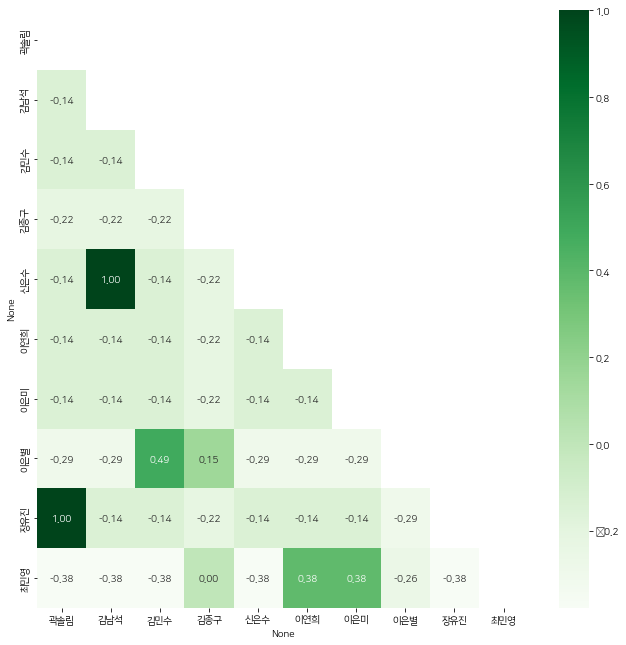

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm #한글 설정



font_location = 'C:/WINDOWS/Fonts/NanumSquare.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

mask = np.triu(np.ones_like(correlation_manager, dtype=np.bool))

plt.figure(figsize=(11,11),facecolor='white')
sns.heatmap(correlation_manager, annot = True, #실제 값 화면에 나타내기
            fmt=".2f",
            cmap = 'Greens', #색상
            mask=mask
          )

### 2개 이상 등장한 고시별 상관도 분석

In [44]:
from collections import Counter


gosi_df2 = pd.DataFrame(columns=['gosi'])

for n_gosi in gosi_lists : # 고시 목록을 돌아라
    

    
    if ',' in n_gosi :
        m_gosi = n_gosi.split(', ')
        gosi_df2 = pd.concat([gosi_df2,pd.DataFrame({'gosi':[m_gosi]})], ignore_index=True)
        
gosi_df2



0               [안전원고시 제2020-8호[고시], 안전원고시 제2020-5호[고시]]
1      [안전원고시 제2020-5호[고시], 안전원고시 제2021-7호[규정], 안전원고시...
2               [안전원고시 제2020-7호[고시], 안전원고시 제2020-5호[고시]]
3      [안전원고시 제2020-6호[고시], 안전원고시 제2020-8호[고시], 안전원고시...
4      [안전원고시 제2020-5호[고시], 안전원고시 제2021-5호[고시], 안전원고시...
                             ...                        
171            [안전원고시 제2021-5호[고시], 장외영향평가서 작성 등에 관한 규정]
172    [안전원고시 제2020-5호[고시], 안전원고시 제2021-5호[고시], 안전원고시...
173           [장외영향평가서 검토 등에 관한 규정, 위해관리계획서 검토 등에 관한 규정]
174    [안전원고시 제2020-5호[고시], 장외영향평가서 이행 등에 관한 규정, 장외영향...
175    [안전원고시 제2020-8호[고시], 안전원고시 제2020-5호[고시], 안전원고시...
Name: gosi, Length: 176, dtype: object

In [45]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
mlb.fit(gosi_df2['gosi'])

print(mlb.classes_) # 등장한 모든 단어
print(len(mlb.classes_))

['안전원고시 제2019-11호[고시]' '안전원고시 제2020-10호[고시]' '안전원고시 제2020-11호[고시]'
 '안전원고시 제2020-12호[고시]' '안전원고시 제2020-5호[고시]' '안전원고시 제2020-6호[고시]'
 '안전원고시 제2020-7호[고시]' '안전원고시 제2020-8호[고시]' '안전원고시 제2020-9호[고시]'
 '안전원고시 제2021-1호[고시]' '안전원고시 제2021-2호[고시]' '안전원고시 제2021-3호[고시]'
 '안전원고시 제2021-3호[규정]' '안전원고시 제2021-5호[고시]' '안전원고시 제2021-7호[규정]'
 '안전원고시 제2021-8호[규정]' '안전원고시 제2021-9호[규정]' '위해관리계획서 검토 등에 관한 규정'
 '위해관리계획서 이행 등에 관한 규정' '위해관리계획서 작성 등에 관한 규정' '장외영향평가서 검토 등에 관한 규정'
 '장외영향평가서 이행 등에 관한 규정' '장외영향평가서 작성 등에 관한 규정']
23


In [46]:
data = mlb.transform(gosi_df2['gosi'])
df_data = pd.DataFrame(data,columns=[mlb.classes_])
df_data

,안전원고시 제2019-11호[고시],안전원고시 제2020-10호[고시],안전원고시 제2020-11호[고시],안전원고시 제2020-12호[고시],안전원고시 제2020-5호[고시],안전원고시 제2020-6호[고시],안전원고시 제2020-7호[고시],안전원고시 제2020-8호[고시],안전원고시 제2020-9호[고시],안전원고시 제2021-1호[고시],...,안전원고시 제2021-5호[고시],안전원고시 제2021-7호[규정],안전원고시 제2021-8호[규정],안전원고시 제2021-9호[규정],위해관리계획서 검토 등에 관한 규정,위해관리계획서 이행 등에 관한 규정,위해관리계획서 작성 등에 관한 규정,장외영향평가서 검토 등에 관한 규정,장외영향평가서 이행 등에 관한 규정,장외영향평가서 작성 등에 관한 규정
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
172,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
174,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [47]:
# 관계가 1에 가깝다는 것은: 두 단어가 자주 같이 출현한다는 것
# 관계가 -1에 가깝다는 것은: 두 단어가 아주 드물게 출현 혹은 겹치는 영역이 없다는 것
correlation = df_data.corr() #상관계수
correlation

,안전원고시 제2019-11호[고시],안전원고시 제2020-10호[고시],안전원고시 제2020-11호[고시],안전원고시 제2020-12호[고시],안전원고시 제2020-5호[고시],안전원고시 제2020-6호[고시],안전원고시 제2020-7호[고시],안전원고시 제2020-8호[고시],안전원고시 제2020-9호[고시],안전원고시 제2021-1호[고시],...,안전원고시 제2021-5호[고시],안전원고시 제2021-7호[규정],안전원고시 제2021-8호[규정],안전원고시 제2021-9호[규정],위해관리계획서 검토 등에 관한 규정,위해관리계획서 이행 등에 관한 규정,위해관리계획서 작성 등에 관한 규정,장외영향평가서 검토 등에 관한 규정,장외영향평가서 이행 등에 관한 규정,장외영향평가서 작성 등에 관한 규정
안전원고시 제2019-11호[고시],1.000000e+00,-0.056344,0.390346,-0.040996,0.032594,-0.092892,-0.100899,-0.053255,-0.071354,0.054554,...,-3.507802e-17,-0.086711,-0.100899,-0.044412,-0.084607,-0.056344,-0.082479,-0.122169,-0.056344,-0.114510
안전원고시 제2020-10호[고시],-5.634362e-02,1.000000,0.074494,-0.048507,0.062299,0.020354,0.003851,0.084017,-0.084427,-0.023473,...,-9.486349e-02,-0.102598,-0.057767,-0.052548,-0.030468,0.030303,-0.026615,-0.089485,0.030303,-0.021393
안전원고시 제2020-11호[고시],3.903465e-01,0.074494,1.000000,0.044567,-0.009503,-0.032448,-0.050205,0.143952,-0.041805,-0.096172,...,-9.994449e-02,-0.073882,-0.050205,-0.066547,-0.069712,-0.084427,-0.065429,-0.183062,-0.084427,-0.171585
안전원고시 제2020-12호[고시],-4.099600e-02,-0.048507,0.044567,1.000000,0.028061,-0.079972,-0.086866,-0.027169,-0.061430,-0.062622,...,-1.084652e-01,-0.074651,-0.004670,-0.038235,-0.072840,-0.048507,-0.071007,-0.031720,-0.048507,-0.098583
안전원고시 제2020-5호[고시],3.259435e-02,0.062299,-0.009503,0.028061,1.000000,-0.048004,0.144468,-0.028663,-0.048398,0.011490,...,1.658395e-01,-0.108051,-0.126988,-0.116585,-0.197754,-0.127565,-0.151994,-0.051154,-0.032633,0.022530
안전원고시 제2020-6호[고시],-9.289217e-02,0.020354,-0.032448,-0.079972,-0.048004,1.000000,0.092887,0.182978,0.127669,0.078831,...,-6.371804e-02,-0.123208,-0.155440,-0.086635,-0.165047,-0.109911,-0.160894,-0.164344,-0.109911,-0.108423
안전원고시 제2020-7호[고시],-1.008991e-01,0.003851,-0.050205,-0.086866,0.144468,0.092887,1.000000,0.033974,0.303240,-0.074577,...,-6.027991e-02,-0.140267,-0.096329,-0.017780,-0.090768,0.003851,-0.084562,-0.048909,0.003851,0.011122
안전원고시 제2020-8호[고시],-5.325537e-02,0.084017,0.143952,-0.027169,-0.028663,0.182978,0.033974,1.000000,0.098054,-0.054233,...,-6.262243e-02,-0.175990,-0.179576,-0.110374,-0.089594,-0.084017,-0.163984,-0.144582,-0.084017,-0.185729
안전원고시 제2020-9호[고시],-7.135366e-02,-0.084427,-0.041805,-0.061430,-0.048398,0.127669,0.303240,0.098054,1.000000,-0.057703,...,-9.994449e-02,-0.129930,-0.151190,-0.066547,-0.126778,-0.084427,-0.123588,-0.137937,-0.084427,-0.078090
안전원고시 제2021-1호[고시],5.455447e-02,-0.023473,-0.096172,-0.062622,0.011490,0.078831,-0.074577,-0.054233,-0.057703,1.000000,...,4.723775e-01,-0.132453,-0.193900,-0.145371,-0.252861,-0.258199,-0.206162,-0.133298,-0.164308,0.027618


C:\Users\joon\AppData\Local\Temp/ipykernel_8944/4159914415.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(correlation, dtype=np.bool))


<AxesSubplot: xlabel='None', ylabel='None'>

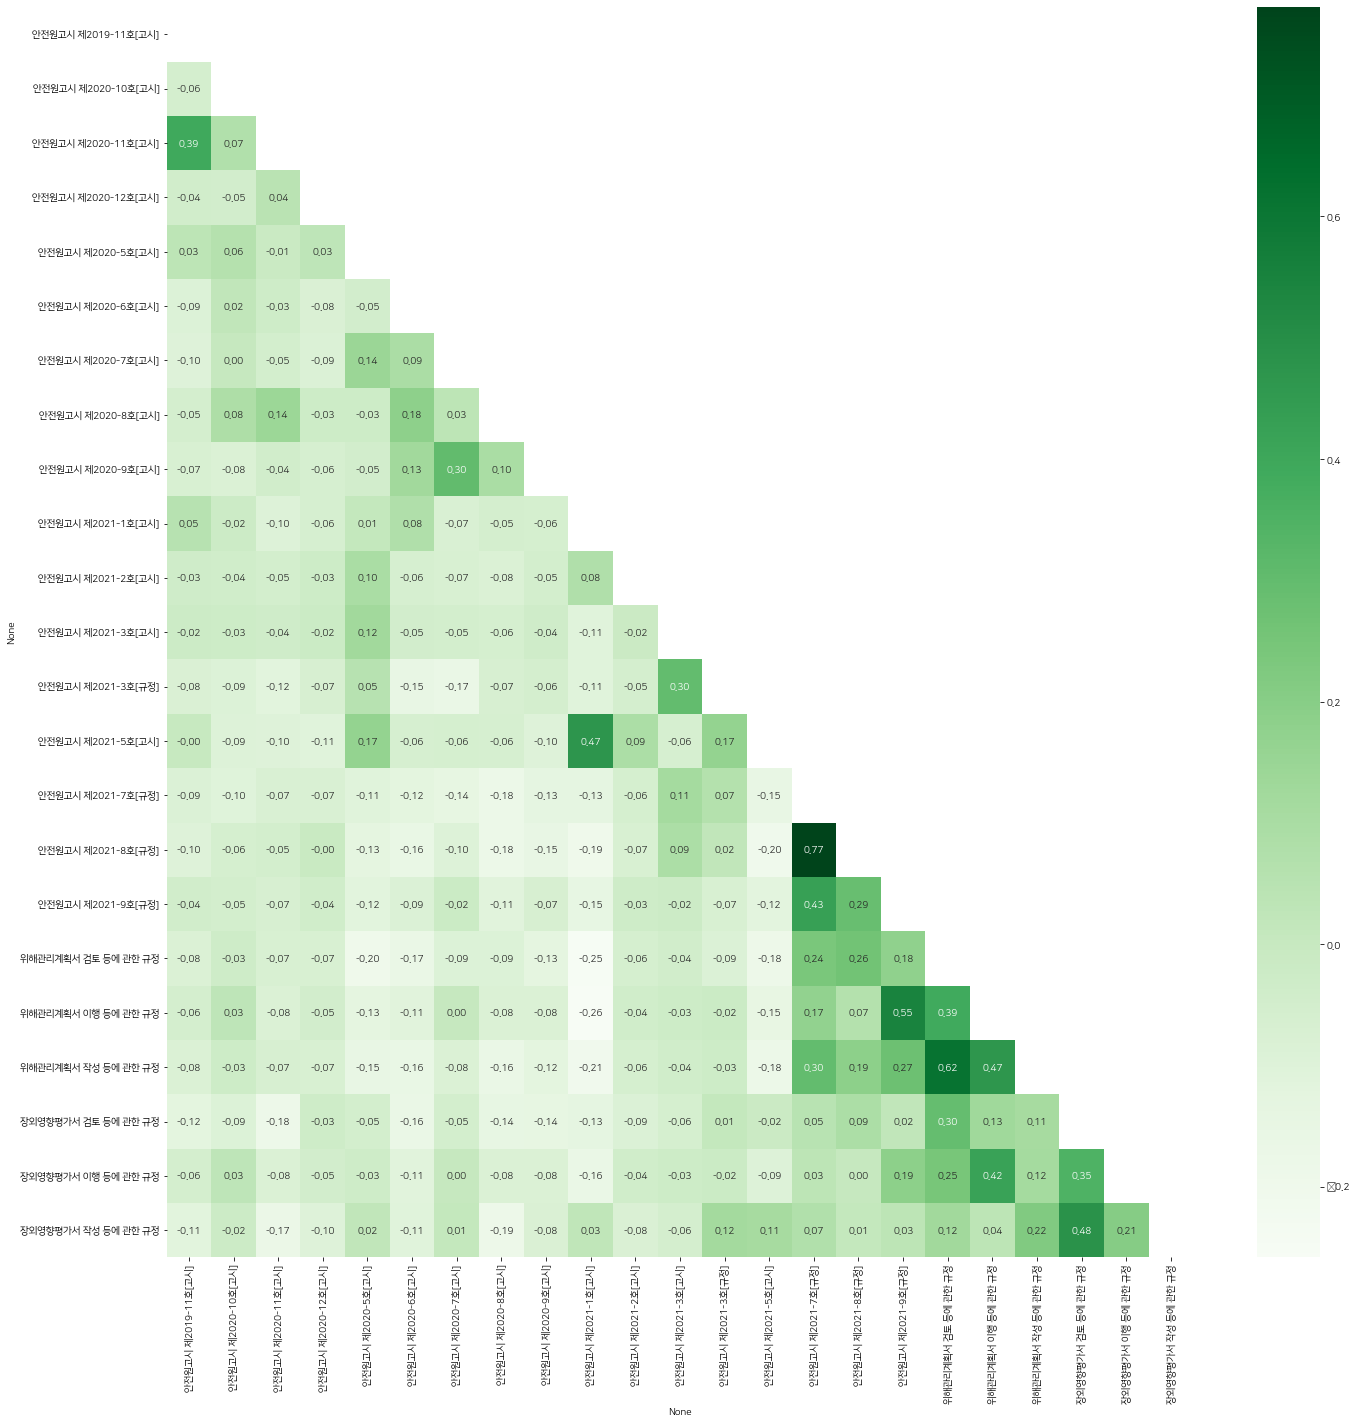

In [53]:
# 20개의 단어 시각화

#top = correlation.iloc[0:20,0:20] # 10개 단어 추출

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm #한글 설정



font_location = 'C:/WINDOWS/Fonts/NanumSquare.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

mask = np.triu(np.ones_like(correlation, dtype=np.bool))

plt.figure(figsize=(23,23),facecolor='white')
sns.heatmap(correlation, annot = True, #실제 값 화면에 나타내기
            fmt=".2f",
            cmap = 'Greens', #색상
            mask=mask
          )